In [140]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For better visualization in notebooks
%matplotlib inline

# To ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')



In [142]:
df = pd.read_csv('crop_recommendation.csv')

In [144]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [43]:
print(f'Datasets Shapes: {df.shape}')

Datasets Shapes: (2200, 8)


In [146]:
print(f'Mising values: {df.isnull().sum()}')
#Cleaned Datasets already so no need to fix any valuse

Mising values: N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [148]:
# Statistical summary
print(f'\n Statistical summary: \n{df.describe()}')


 Statistical summary: 
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


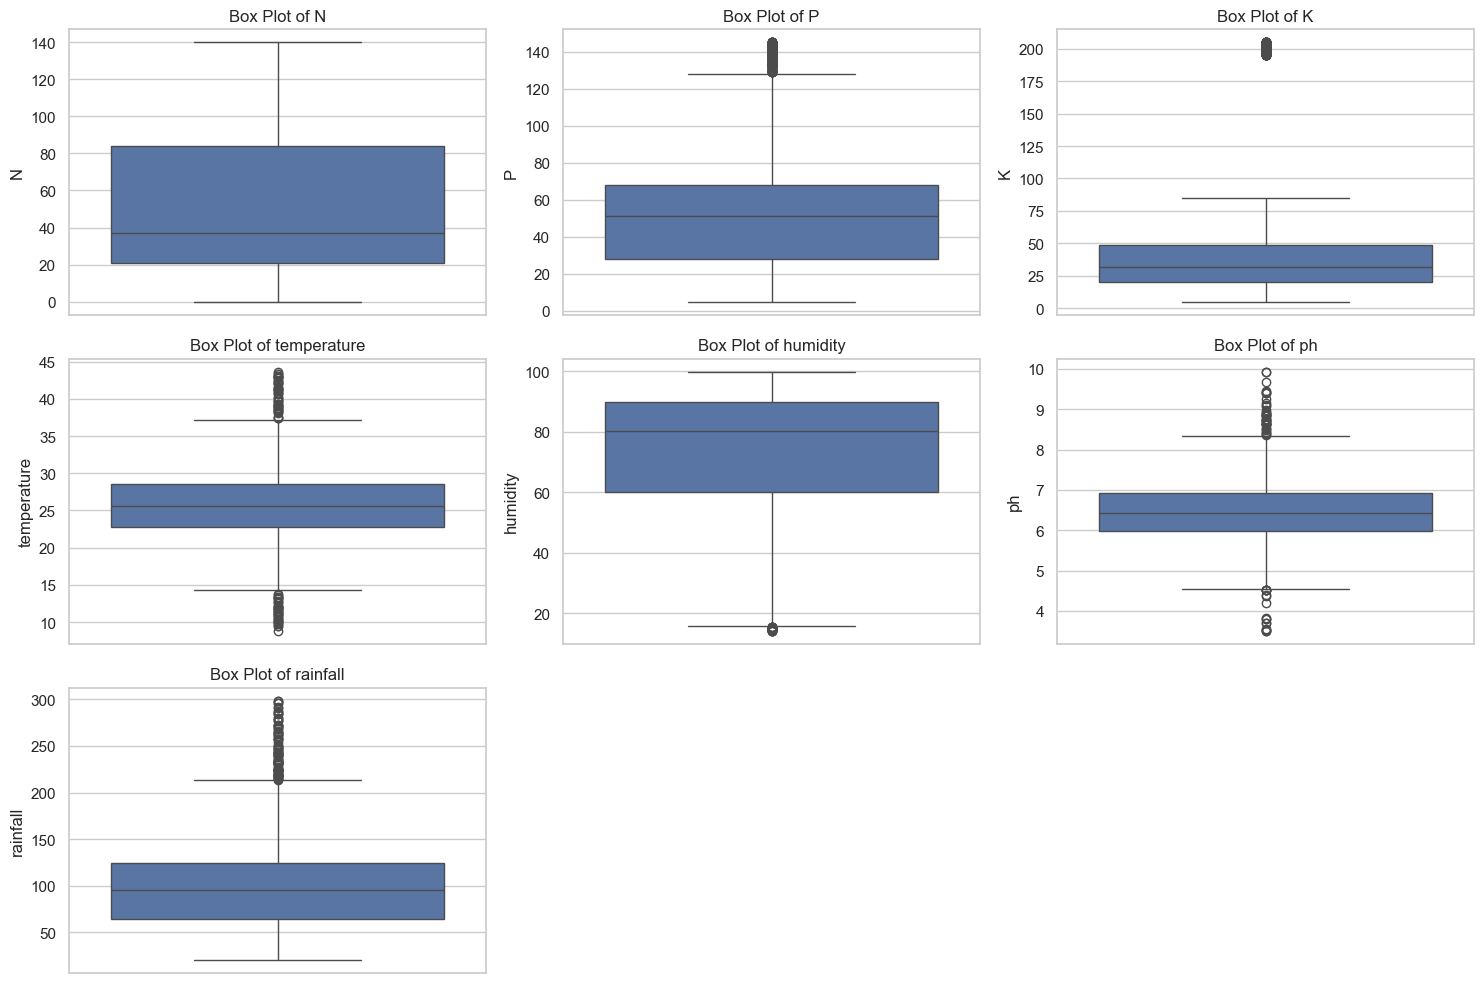

In [53]:
sns.set(style="whitegrid")

# List of numerical columns
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

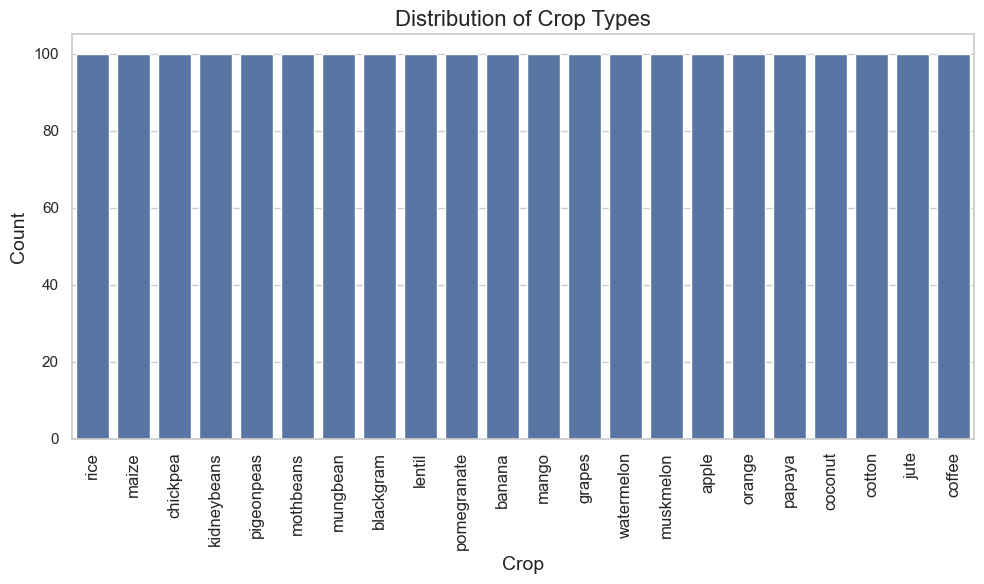

In [150]:
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Crop Types', fontsize=16)
plt.xlabel('Crop', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotating labels vertically for readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [152]:
# Datas PreProcessing: >>>>>>>>>>>>>>>>> 
# as step 1: We can rename the Lebel aas Crop
# Rename the target column for clarity
df.rename(columns={'label': 'crop'}, inplace=True)


In [63]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [154]:
# Initialize LabelEncoder
le = LabelEncoder()

# Check the data type of 'crop' column before encoding
print("Data type of 'crop' column before encoding:", df['crop'].dtype)


Data type of 'crop' column before encoding: object


In [158]:
# Encode the target variable only if it's categorical
if df['crop'].dtype == 'object' or df['crop'].dtype.name == 'category':
    df['crop_encoded'] = le.fit_transform(df['crop'])
    target_column = 'crop_encoded'
    target_names = le.classes_
else:
    target_column = 'crop'
    target_names = [str(cls) for cls in np.unique(df['crop'])]


In [160]:
# Verify the encoding
print("\nEncoded Classes:", le.classes_)
print("Sample Encoded Labels:\n", df[['crop', 'crop_encoded']].head())



Encoded Classes: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
Sample Encoded Labels:
    crop  crop_encoded
0  rice            20
1  rice            20
2  rice            20
3  rice            20
4  rice            20


In [162]:
# Features and target
if 'crop_encoded' in df.columns:
    X = df.drop(['crop', 'crop_encoded'], axis=1)
    y = df['crop_encoded']
else:
    X = df.drop('crop', axis=1)
    y = df['crop']


In [164]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)


In [166]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Verify the split
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (1760, 7)
Test set size: (440, 7)


In [168]:
# Check class distribution in training set
print("\nClass distribution in Training set:")
print(y_train.value_counts())

# Check class distribution in test set
print("\nClass distribution in Test set:")
print(y_test.value_counts())



Class distribution in Training set:
crop_encoded
16    80
7     80
4     80
17    80
19    80
12    80
8     80
21    80
20    80
11    80
18    80
2     80
0     80
15    80
5     80
14    80
10    80
1     80
6     80
13    80
9     80
3     80
Name: count, dtype: int64

Class distribution in Test set:
crop_encoded
16    20
1     20
18    20
14    20
10    20
17    20
4     20
5     20
8     20
9     20
0     20
12    20
7     20
13    20
19    20
21    20
2     20
20    20
3     20
11    20
6     20
15    20
Name: count, dtype: int64


In [170]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [172]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)


In [175]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 99.55%


In [177]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))



Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
  

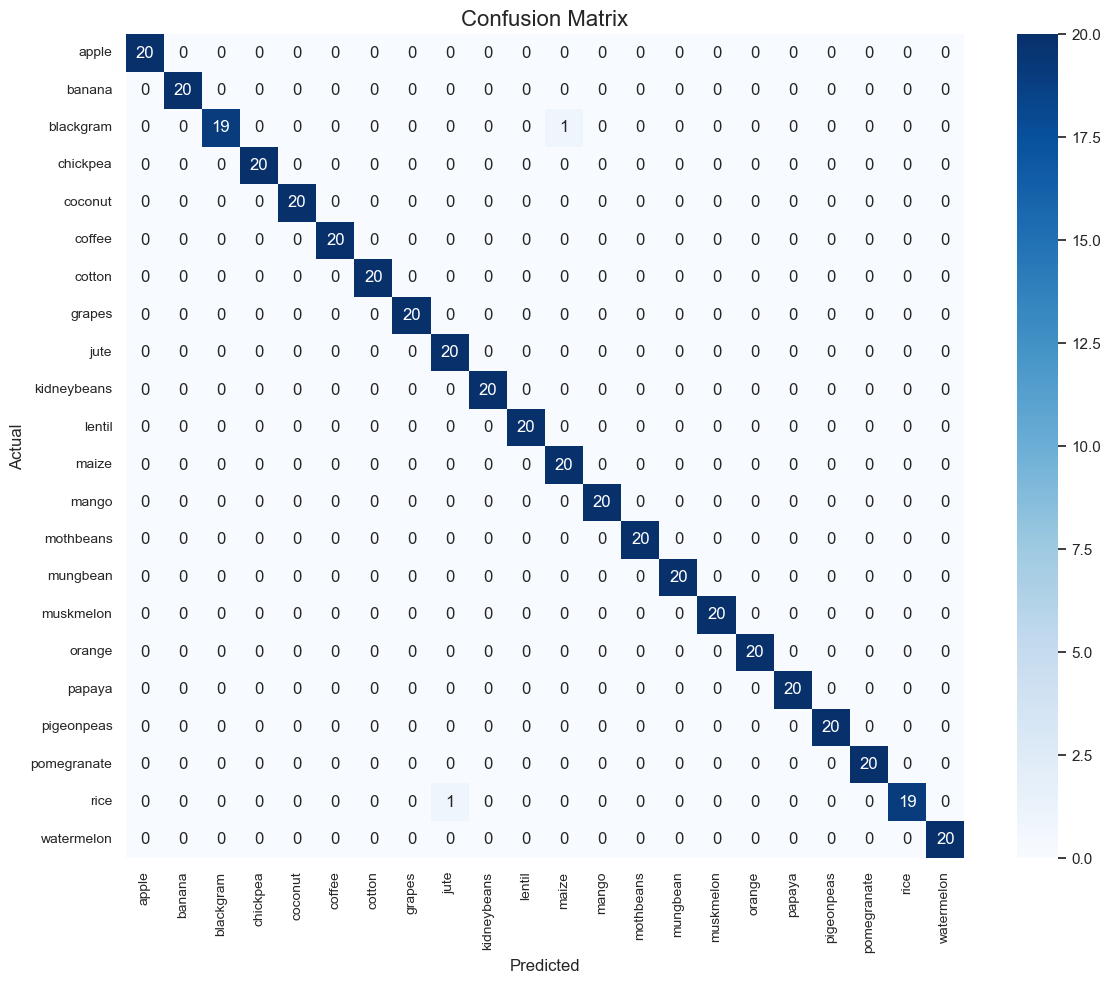

In [179]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


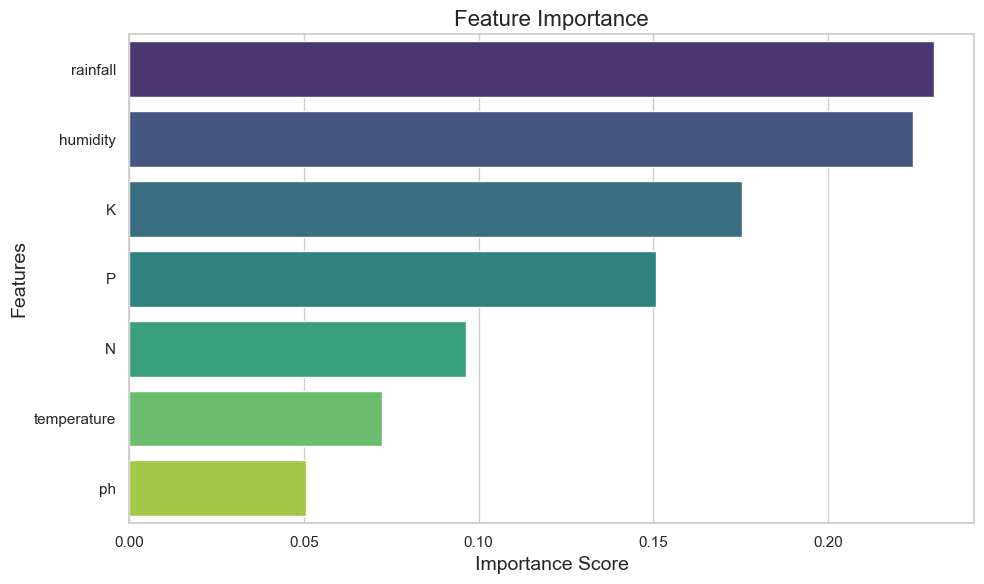

In [181]:
# Feature Importance
importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()


In [183]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()*100:.2f}%")
print(f"Standard Deviation: {cv_scores.std()*100:.2f}%")


Cross-Validation Accuracy Scores: [0.99772727 0.99318182 0.99772727 0.99772727 0.98863636]
Mean CV Accuracy: 99.50%
Standard Deviation: 0.36%


In [185]:
# Confirm that 'crop_encoded' is only present in the target
print("Columns in DataFrame:", df.columns.tolist())


Columns in DataFrame: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop', 'crop_encoded']


In [187]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_classifier, 'crop_recommendation_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the LabelEncoder
joblib.dump(le, 'label_encoder.pkl')

print("Model, scaler, and label encoder saved successfully!")


Model, scaler, and label encoder saved successfully!


In [189]:
# Check if files are saved (Optional)
import os

print("Files in current directory:", os.listdir('.'))


Files in current directory: ['.ipynb_checkpoints', 'CropDEtection_model.ipynb', 'crop_recommendation.csv', 'crop_recommendation_model.pkl', 'label_encoder.pkl', 'scaler.pkl']


In [191]:
def predict_crop(n, p, k, temperature, humidity, ph, rainfall):
    """
    Predicts the crop type based on input features.

    Parameters:
    - n (float): Nitrogen content
    - p (float): Phosphorus content
    - k (float): Potassium content
    - temperature (float): Temperature in Celsius
    - humidity (float): Humidity percentage
    - ph (float): Soil pH
    - rainfall (float): Rainfall in mm

    Returns:
    - str: Predicted crop name
    """
    # Load the scaler and model
    scaler = joblib.load('scaler.pkl')
    rf_classifier = joblib.load('crop_recommendation_model.pkl')
    le = joblib.load('label_encoder.pkl')
    
    # Create a dataframe from input
    input_data = pd.DataFrame([[n, p, k, temperature, humidity, ph, rainfall]],
                              columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
    
    # Scale the input data
    input_scaled = scaler.transform(input_data)
    
    # Predict
    prediction = rf_classifier.predict(input_scaled)
    
    # Decode the prediction
    crop = le.inverse_transform(prediction)
    
    return crop[0]

# Example prediction
predicted_crop = predict_crop(90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536)
print(f"Predicted Crop: {predicted_crop}")


Predicted Crop: rice
